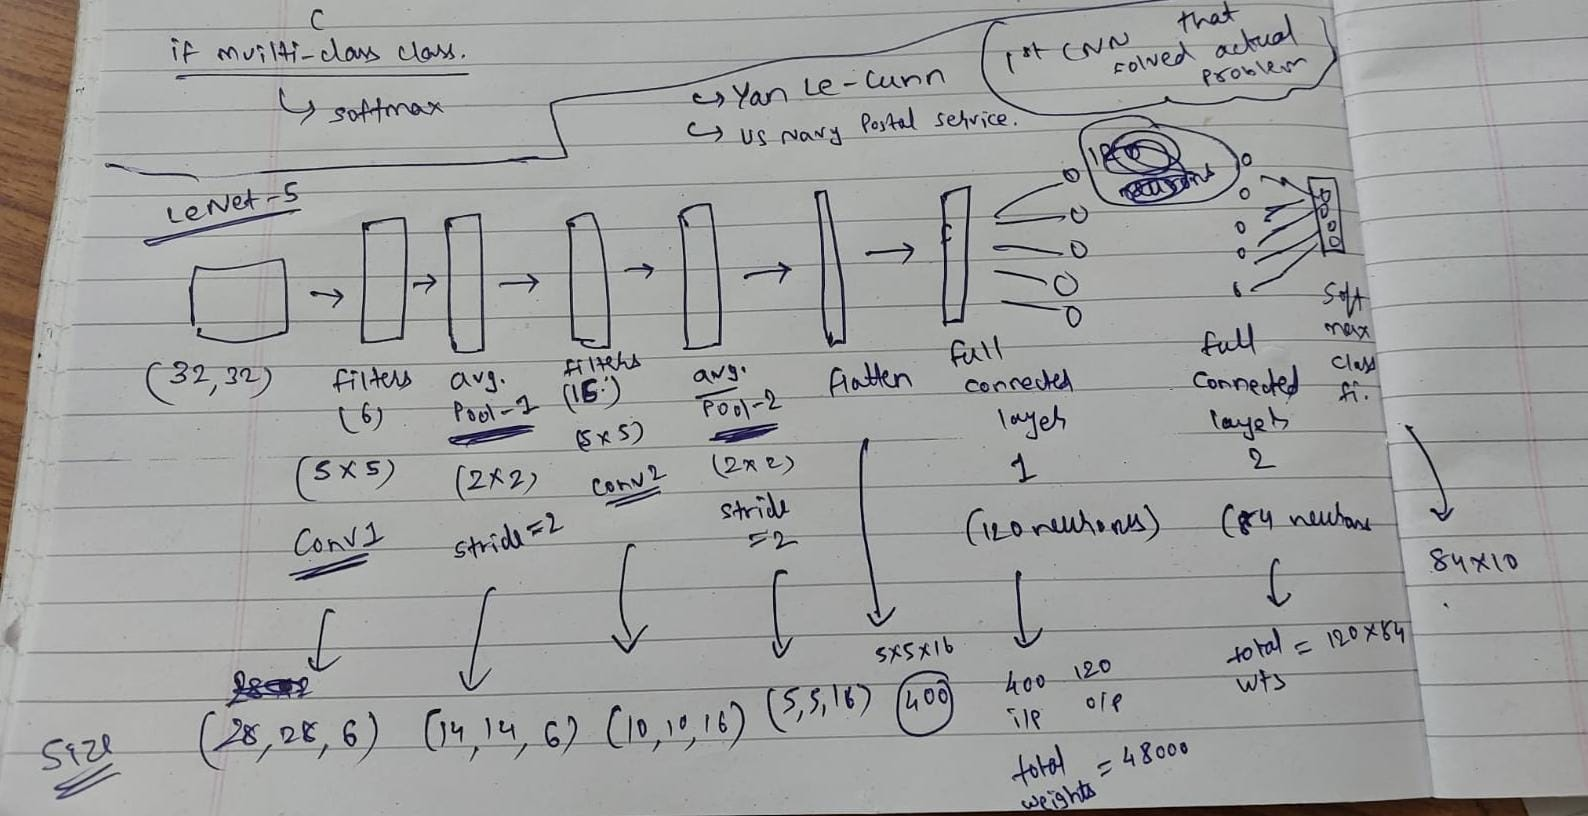

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels = 6, kernel_size=5, stride =1)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=6, out_channels =16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels= 120, kernel_size=5, stride=1)
        
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))   # (120, 1, 1)
        x = F.view(x.size(0), -1)   # flatten (batch_size, 120)
        x = F.relu(self.fc1(x))     # (batch_size, 84)
        x = self.fc2(x)
        
        return x 